In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
files = [r'data\Bold_744H-10_31-11_07.csv', r'data\Courageous_729H-09_25-09_28.csv', r'data\Fearless_709H-10_31-11_07.csv', r'data\Gallant_102H-10_04-10_11.csv', r'data\Noble_4H-10_24-10_29.csv', r'data\Resolute_728H-10_14-10_21.csv', r'data\Ruthless_745H-10_01-10_08.csv', r'data\Steadfast_505H-10_30-11_07.csv', r'data\Valiant_505H-09_22-09_30.csv']

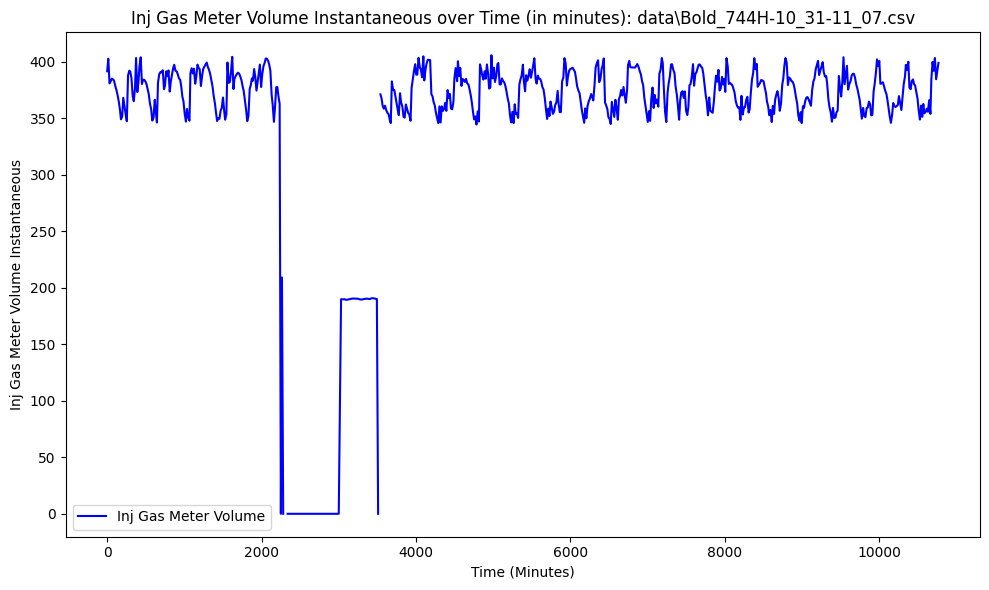

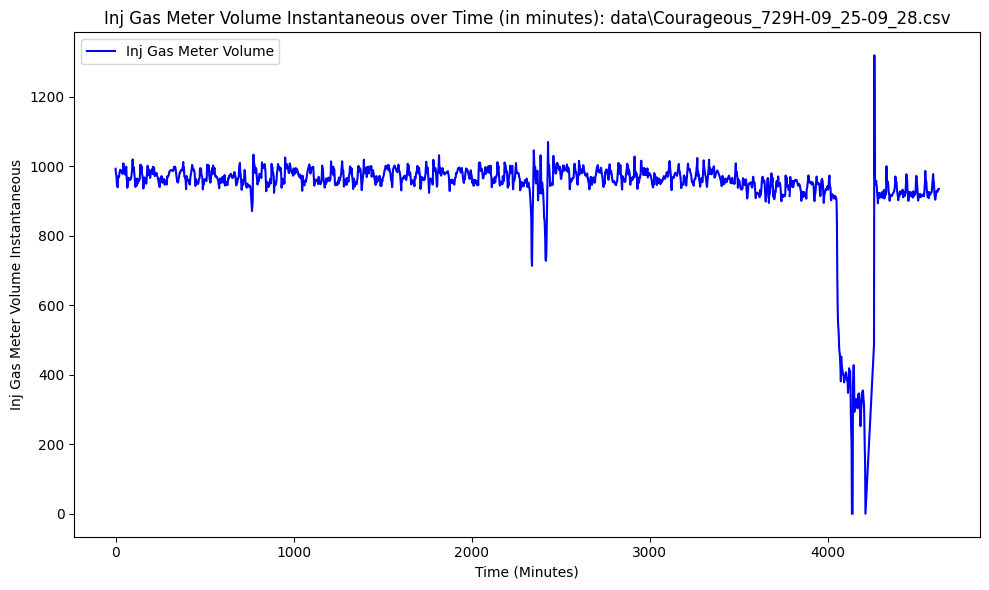

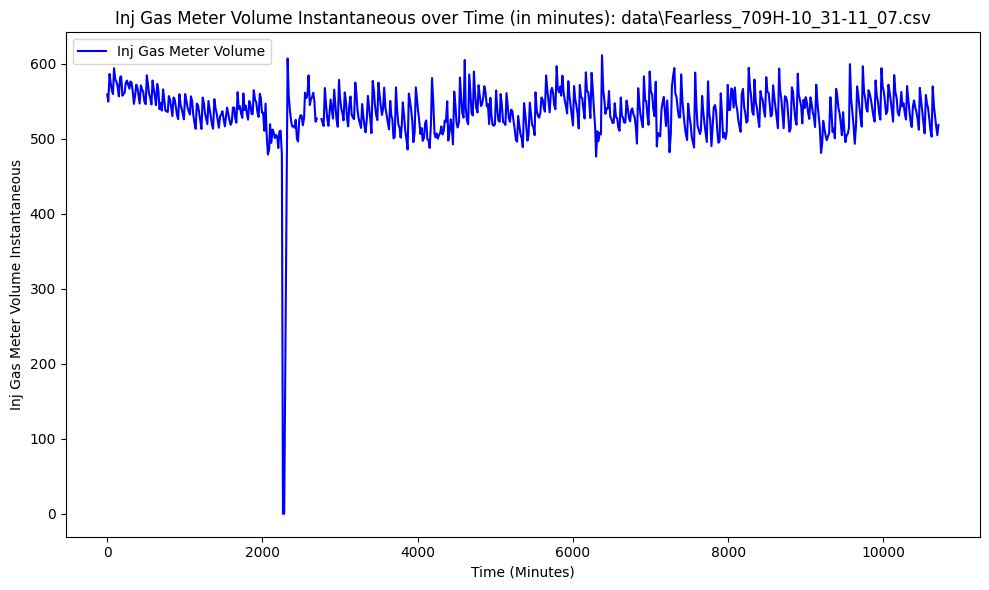

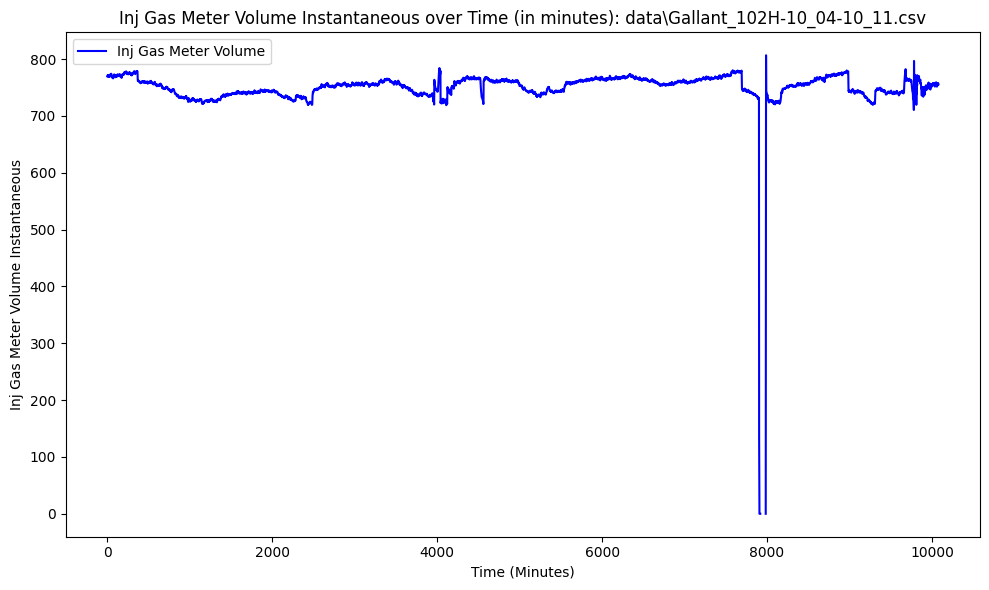

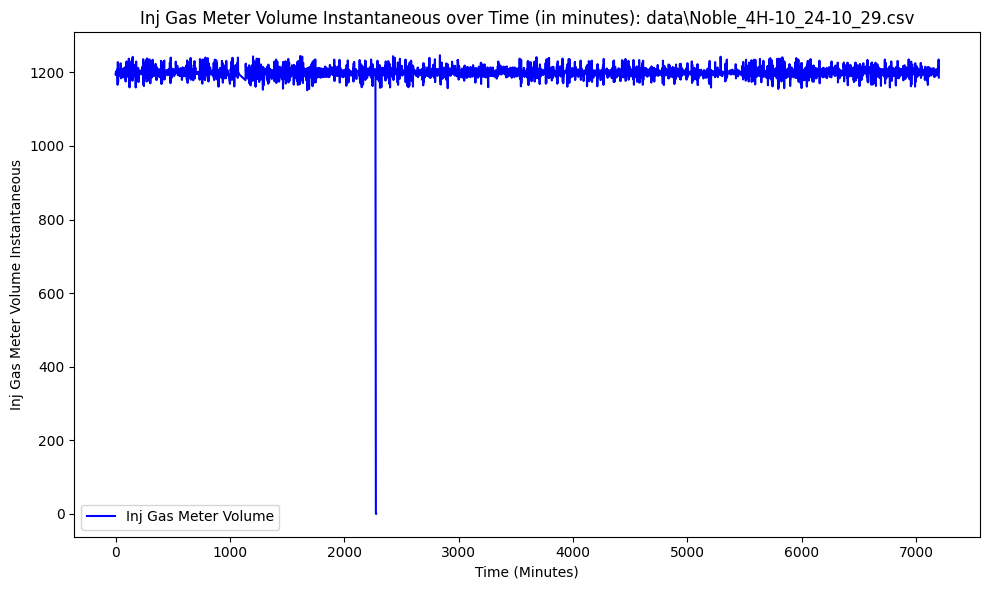

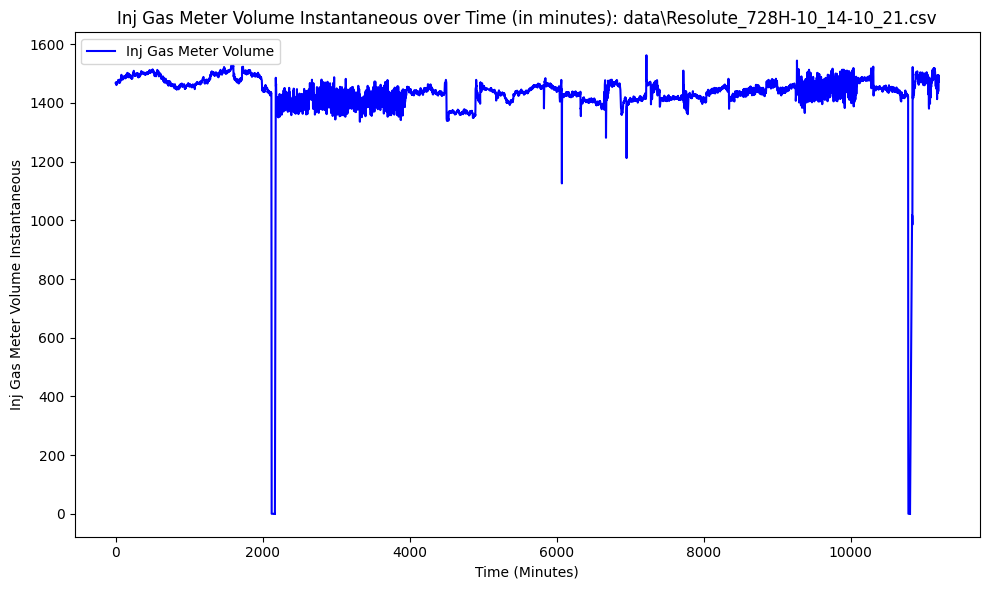

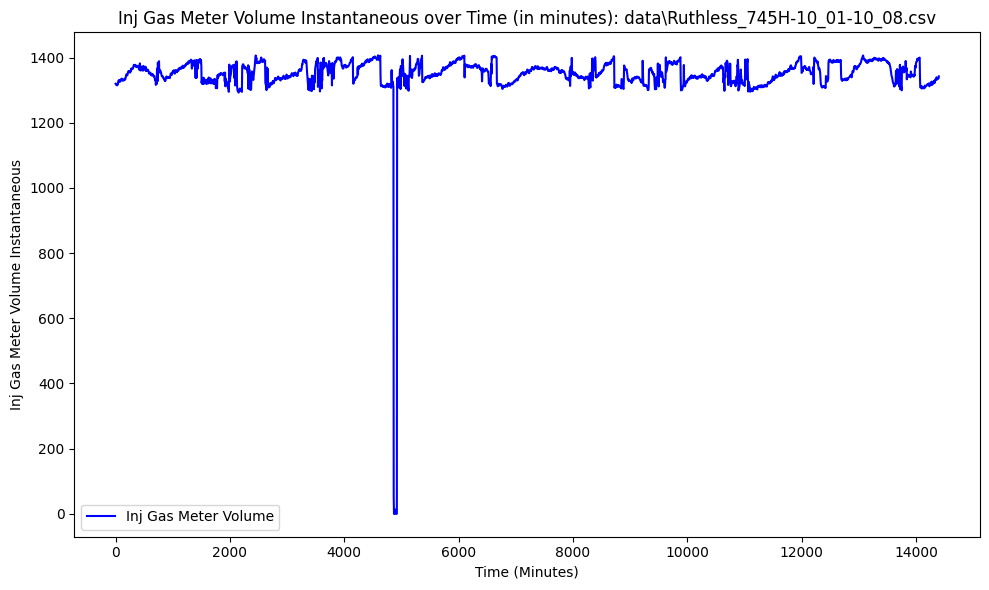

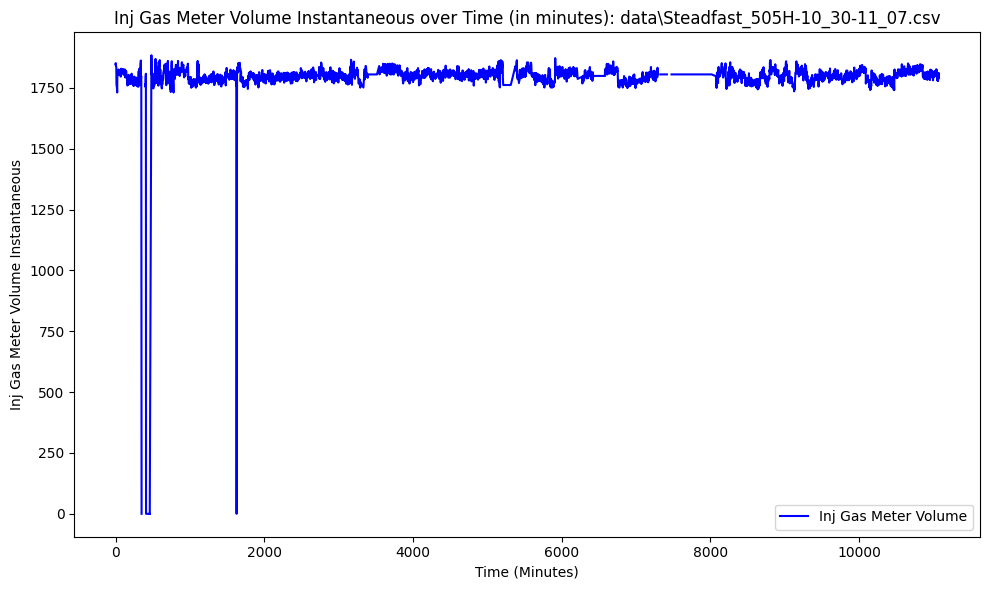

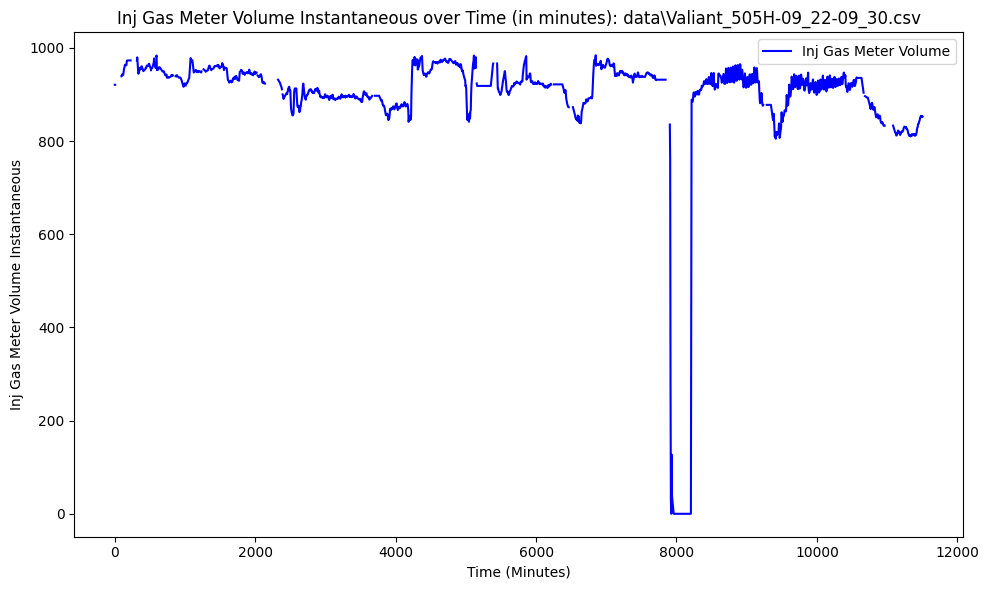

In [13]:
for file in files:
    df = pd.read_csv(file)
    df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %I:%M:%S %p')
    df['Time in Minutes'] = (df['Time'] - df['Time'].iloc[0]).dt.total_seconds() / 60

    # Now, plot the data with 'Time in Minutes' on the x-axis
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time in Minutes'], df['Inj Gas Meter Volume Instantaneous'], label='Inj Gas Meter Volume', color='b')

    # Add labels and title
    plt.xlabel('Time (Minutes)')
    plt.ylabel('Inj Gas Meter Volume Instantaneous')
    plt.title(f'Inj Gas Meter Volume Instantaneous over Time (in minutes): {file}')
    # Show the plot
    plt.legend()
    plt.tight_layout()
    
    plt.show()

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv(r'data\Bold_744H-10_31-11_07.csv')
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %I:%M:%S %p')
df['Time in Minutes'] = (df['Time'] - df['Time'].iloc[0]).dt.total_seconds() / 60
df = df.dropna(subset=["Inj Gas Meter Volume Instantaneous"])

# Use a larger portion of data for better visibility (e.g., first 1000 data points for smoothness)
x_data = df['Time in Minutes'].values[:1000]
y_data = df['Inj Gas Meter Volume Instantaneous'].values[:1000]

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], label='Inj Gas Meter Volume', color='b')

# Set initial axis limits
ax.set_xlim(x_data[0], x_data[0] + 50)  # initial 50 minute window
ax.set_ylim(y_data.min(), y_data.max())
ax.set_xlabel('Time (Minutes)')
ax.set_ylabel('Inj Gas Meter Volume Instantaneous')
ax.set_title('Live Inj Gas Meter Volume Instantaneous over Time')
ax.legend()

# Loop to update the plot with new data points
window_size = 200  # Display 200 data points at a time for better smoothness and faster transition
for i in range(1, len(x_data) + 1):
    start = max(0, i - window_size)
    x_subset = x_data[start:i]
    y_subset = y_data[start:i]
    
    # Update the plot data
    line.set_data(x_subset, y_subset)
    
    # Dynamically adjust x-axis limits for the last 'window_size' points
    ax.set_xlim(x_subset[0], x_subset[-1])
    
    # Redraw the plot and pause to update the plot faster
    plt.draw()
    plt.pause(0.01)  # Faster update (0.01 seconds between updates)

# Pause one more time to make sure the last frame is rendered before closing
plt.pause(0.1)  # Short additional pause to ensure last frame is shown

# Close the plot after the animation is complete
plt.close(fig)


C:\Users\anika\AppData\Local\Temp\ipykernel_33328\3900650060.py:37: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(x_subset[0], x_subset[-1])
